In [1]:
import japanize_matplotlib

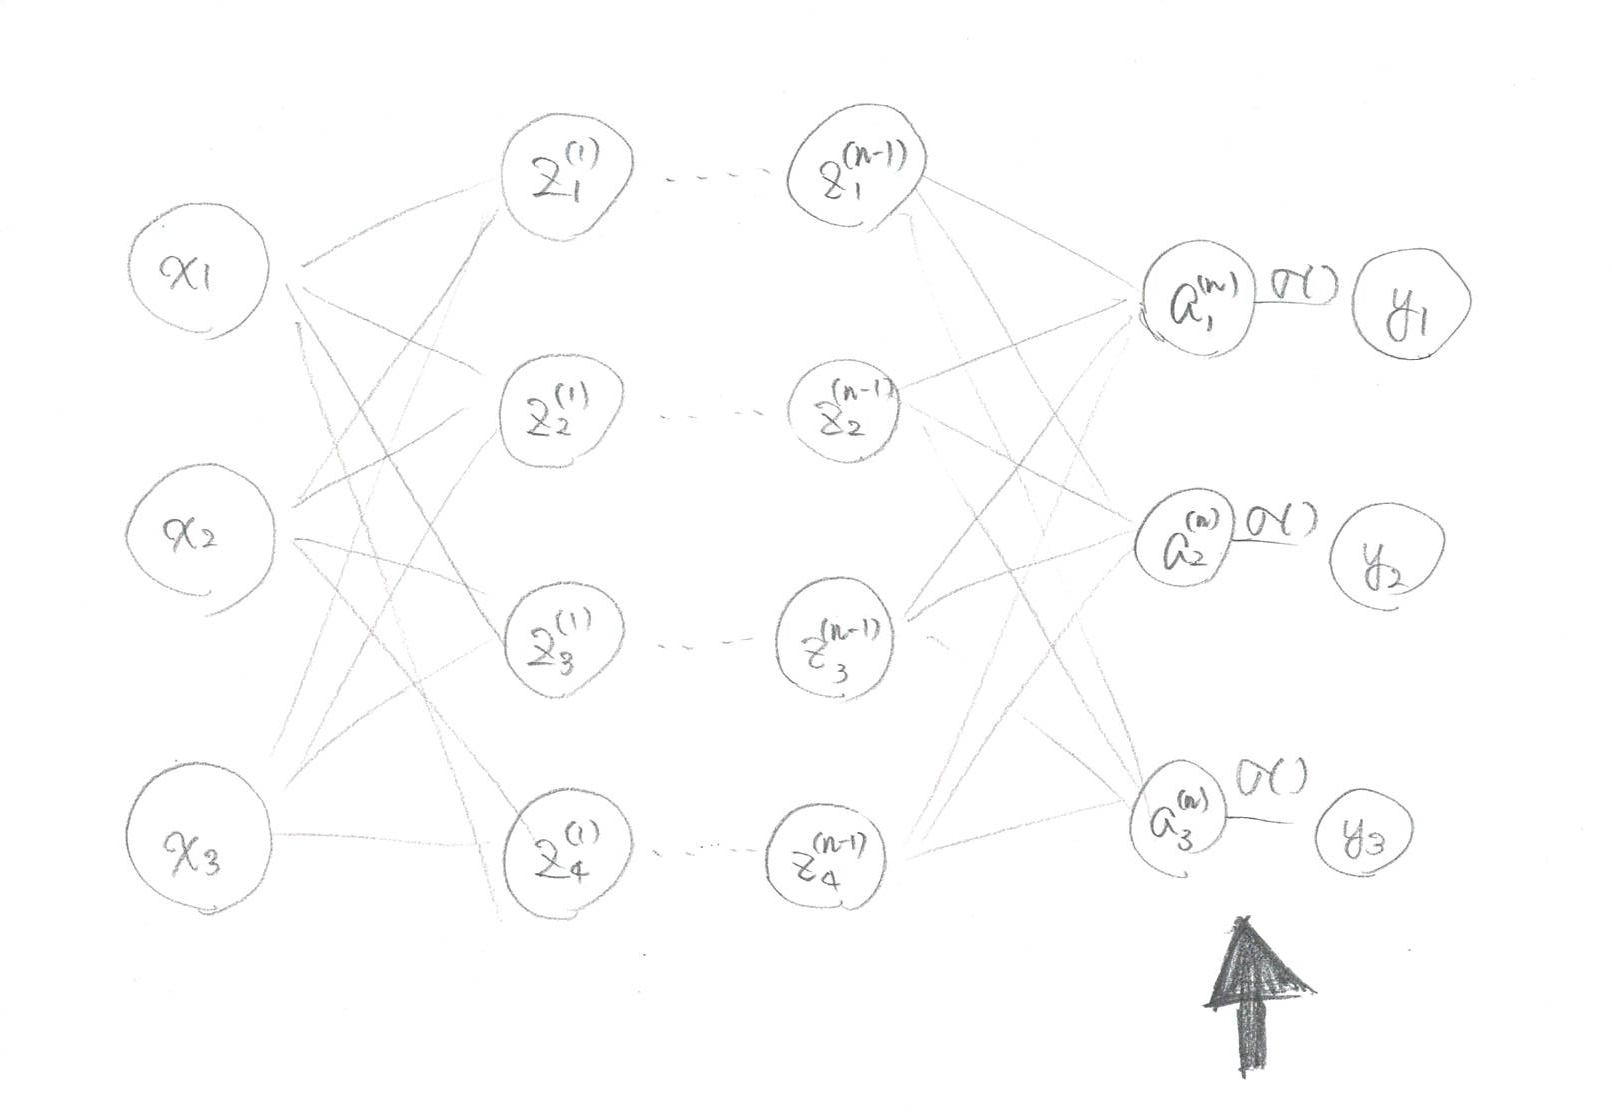

In [2]:
from IPython.display import Image
Image('ソフトマックス関数について.png')

## $$\hspace{140mm}【ここの話】$$

# 出力層が下記条件を満たす関数を作りたい！

### ○マイナスの値も処理したい
### ○大きな値を強調したい
### ○確率と考えられるようにしたい

# ○マイナスの値も処理したい

# ○大きな値を強調したい

## 　⇨さまざまな関数の形と出力を見てみる

## ・xの定数乗

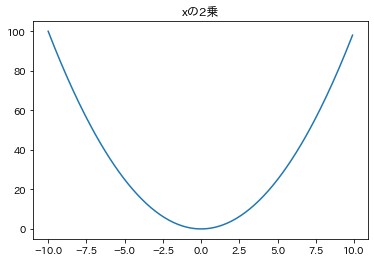

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
x = np.arange(-10, 10, 0.1)
y = x**2
plt.plot(x, y)
plt.title('xの2乗')
plt.show()

In [4]:
def func1(x):
    y = x**2
    return y

x = np.array([-5, 1, 9])
func1(x)

array([25,  1, 81])

### ⇨大小関係が変わる関数なので確率として表示したい時に適切でない

## ・絶対値

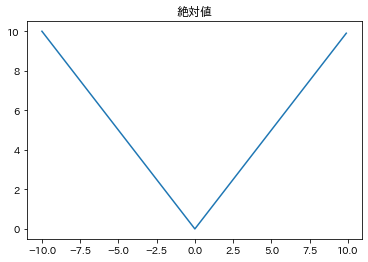

In [5]:
x = np.arange(-10, 10, 0.1)
y = abs(x)
plt.plot(x, y)
plt.title('絶対値')
plt.show()

In [6]:
def func2(x):
    y = abs(x)
    return y

x = np.array([-5, 1, 9])
func2(x)

array([5, 1, 9])

### ⇨大小関係が変わる関数なので確率として表示したい時に適切でない

## ・最小値を足す

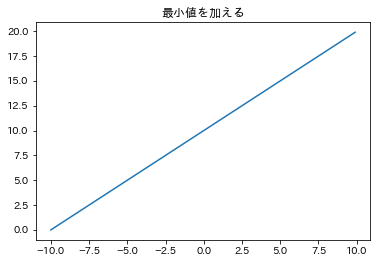

In [7]:
x = np.arange(-10, 10, 0.1)
y = x + 10
plt.plot(x, y)
plt.title('最小値を加える')
plt.show()

In [8]:
def func3(x):
    y = x + abs(min(x))
    return y

x = np.array([-5, 1, 9])
func3(x)

array([ 0,  6, 14])

### ⇨大小関係変化ないので確率として問題ない（と思いますがどうでしょうか）けど強調ができない

## ・ 定数のx乗

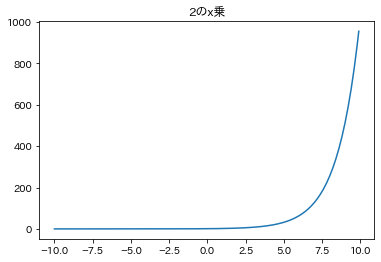

In [11]:
x = np.arange(-10, 10, 0.1)
y = 2**x
plt.plot(x, y)
plt.title('2のx乗')
plt.show()

In [25]:
def func4(x):
    y = 2. ** x
    return y
np.set_printoptions(precision=2, suppress=True)
x = np.array([-5, 1, 9])
func4(x)

array([  0.03,   2.  , 512.  ])

### ⇨大小関係、強調ともに問題なし！できればこれを使いたいが、、、

## 【懸念点】
### ●さまざまな計算をしていく中で、これ以上便利にならないか
### ●関数適用前と後で数値の大きさが変わるが同じ確率として考えていいのか

# ●さまざまな計算をしていく中で、これ以上便利にならないか

### ネタバレになるが、ディープラーニングを学ぶ上で微分は必要不可欠。
### 微分の計算のしやすさを考えてネイピア数が使われているそう。

## $$y = 2^x$$
## $$y' = 2^xlog2$$

## $$y = e^x$$
## $$y' = e^x$$

# ●関数適用前と後で数値の大きさが変わるが同じ確率として考えていいのか

### 一番の違和感の原因は比が変わることな気がする。
### 先程の最小値を足したような変化であれば、確率と考える上で違和感はない。（少なくとも私はそうです。）
### つまり線形的な変換であれば納得できる人も増えそう。
### でも非線形であるメリットが大きすぎることと,
### 意思決定に使えれば良いのでおおむね確率と考えて次に進めばいいでしょう、というところが本音だそう。

### ここまでをまとめると全ての懸念や条件をパスできそうなのが、下記の変換

## $$f(x) = e^x$$

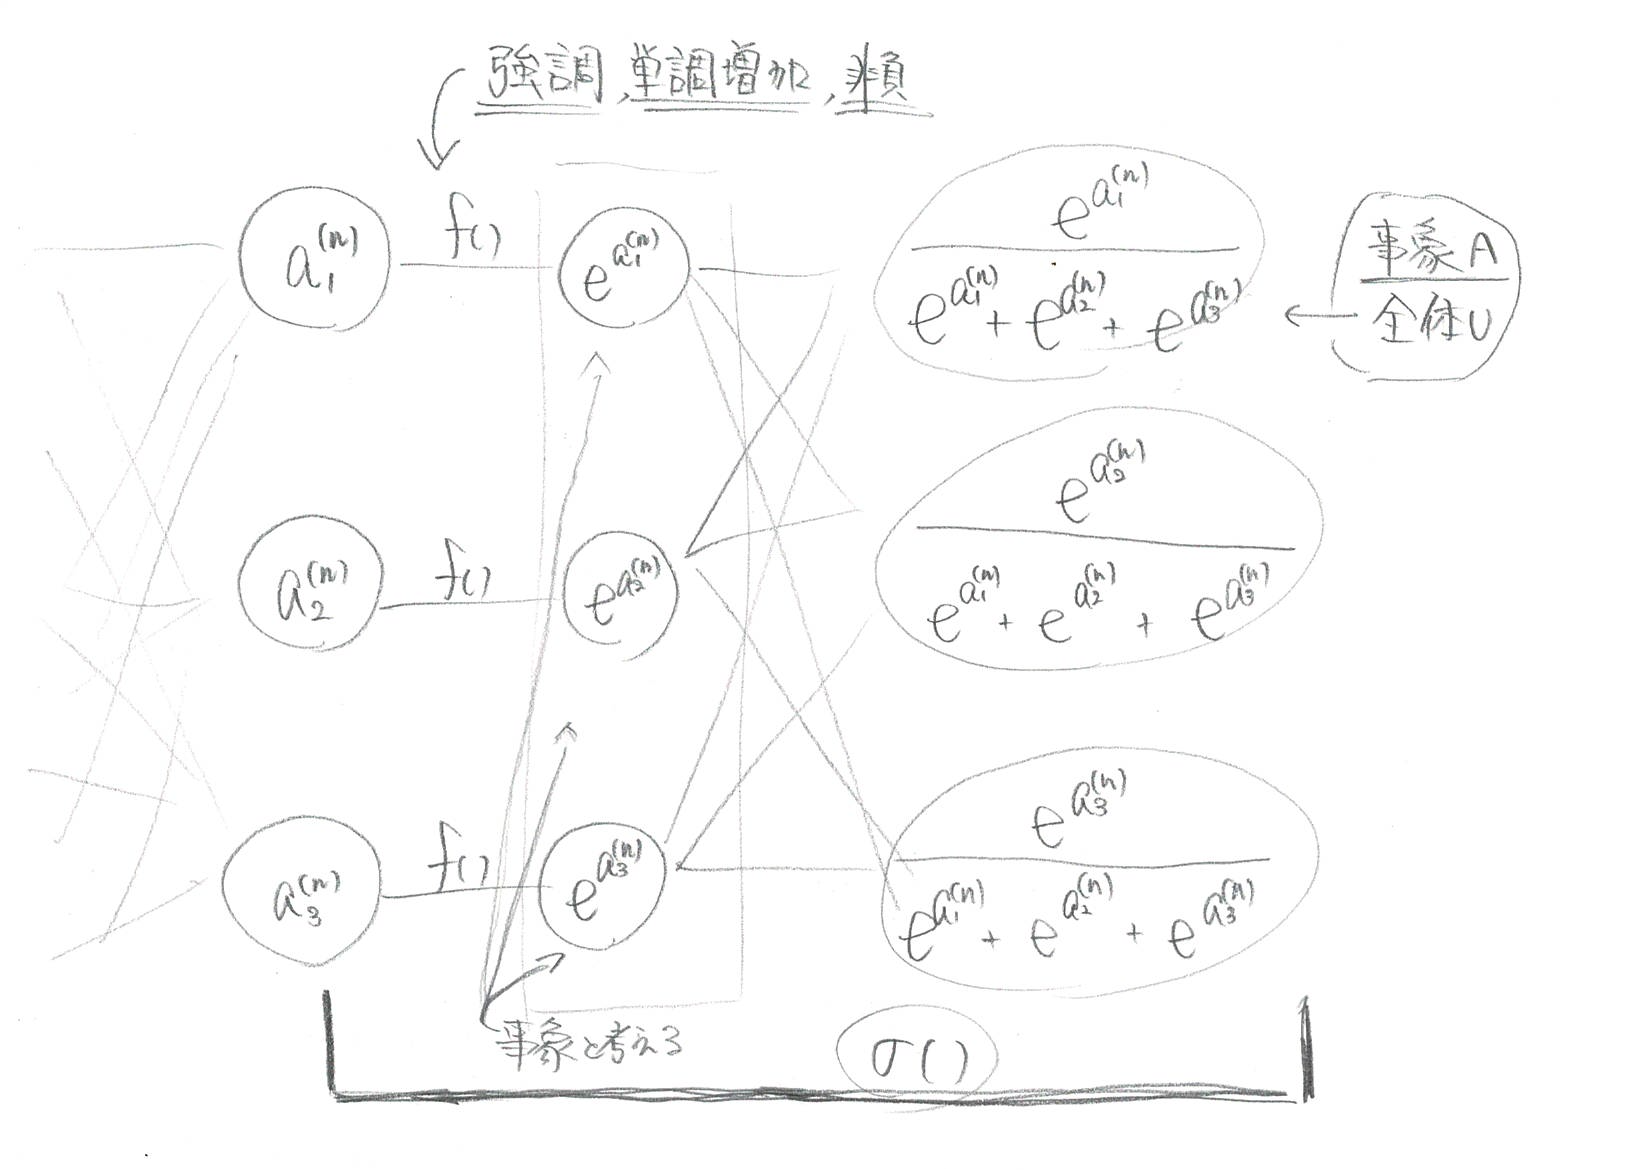

In [3]:
from IPython.display import Image
Image('ソフトマックス関数について2.png')

# ○確率と考えられるようにしたい

## ⇨下記（公理的確率論）を満たすことを確認する

# Ⅰ.　任意の事象Aが起こる確率P(A)は
# $$0 \leqq P(A) \leqq 1$$
# Ⅱ.　今、考えている事象全体Zが起こる確率P(Z)は
# $$P(Z) = 1$$
# Ⅲ.　任意の有限個の事象A1,A2,...Anは
## $$P(A_1\cup A_2\cup ...\cup A_n) = P(A_1) + P(A_2) + ... + P(A_n)$$

# Ⅰ について、値を大きくするために、、、

## $$\frac{e^{a_1^{(n)}}}{e^{a_1^{(n)}}+e^{a_2^{(n)}}+e^{a_3^{(n)}}}$$
## $$e^{a_1^{(n)}}=100$$
## $$e^{a_2^{(n)}}=0$$
## $$e^{a_3^{(n)}}=0$$

## を代入して考えると

## $$= \frac{100}{100 + 0 + 0} = 1$$

# Ⅰ について、値を小さくするために、、、

## $$e^{a_1^{(n)}}=0$$
## $$e^{a_2^{(n)}}=100$$
## $$e^{a_3^{(n)}}=100$$

## を代入して考えると

## $$= \frac{0}{0 + 100 + 100} = 0$$

## こんな感じでどんな数値を入れて頑張ってみても Ⅰ を満たす

# Ⅱ について、全ての事象を足すと

## $$\frac{e^{a_1^{(n)}}}{e^{a_1^{(n)}}+e^{a_2^{(n)}}+e^{a_3^{(n)}}} + \frac{e^{a_2^{(n)}}}{e^{a_1^{(n)}}+e^{a_2^{(n)}}+e^{a_3^{(n)}}} + \frac{e^{a_3^{(n)}}}{e^{a_1^{(n)}}+e^{a_2^{(n)}}+e^{a_3^{(n)}}}$$
## $$= \frac{e^{a_1^{(n)}}+e^{a_2^{(n)}}+e^{a_3^{(n)}}}{e^{a_1^{(n)}}+e^{a_2^{(n)}}+e^{a_3^{(n)}}}$$
## $$= 1$$

## よって Ⅱ を満たす

# Ⅲ について考えるために、下記のような具体例を考える

### $$a_1^{(n)}:犬の画像であると判断した人の数$$
### $$a_2^{(n)}:猫の画像であると判断した人の数$$
### $$a_3^{(n)}:狸の画像であると判断した人の数$$
### $$e^{a_1^{(n)}}:犬の画像であると判断した人の数を強調した数値$$
### $$e^{a_2^{(n)}}:猫の画像であると判断した人の数を強調した数値$$
### $$e^{a_3^{(n)}}:狸の画像であると判断した人の数を強調した数値$$

### 犬の画像であり猫の画像でもあると判断するパターンはないので、下のベン図のように考えられる

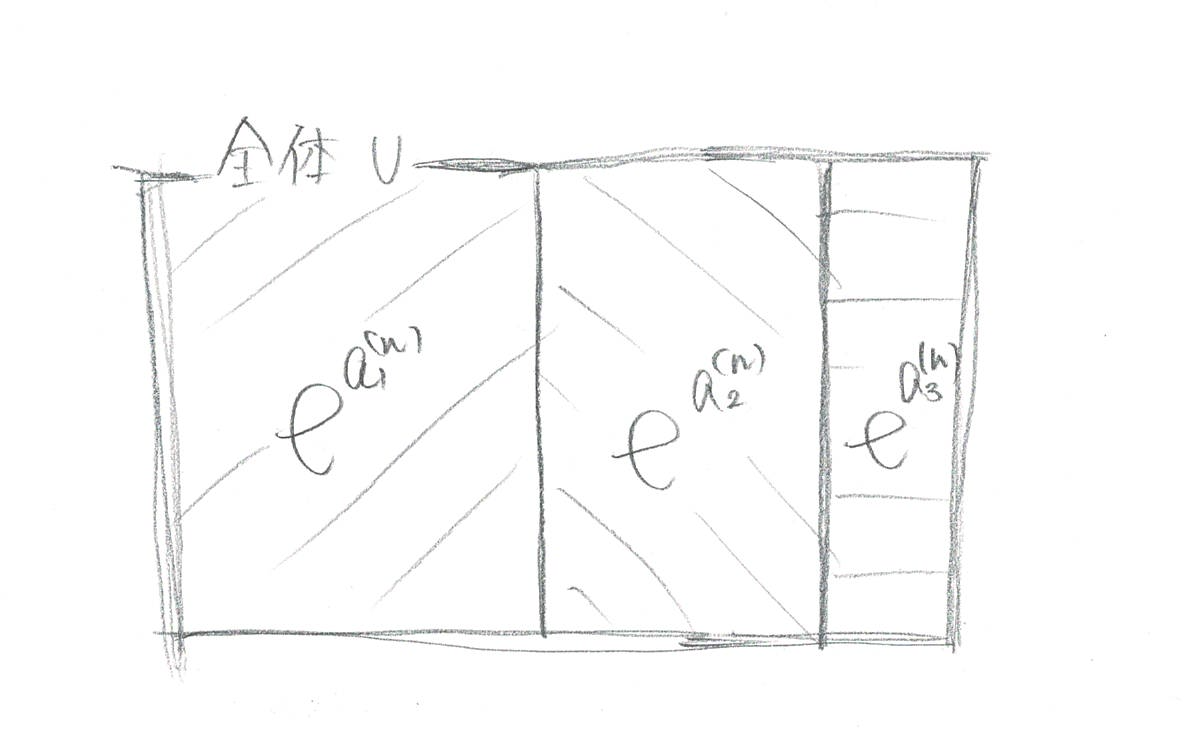

In [4]:
from IPython.display import Image
Image('ソフトマックス関数について3.png')

## よって、Ⅲ を満たす